<a href="https://colab.research.google.com/github/harshitadd/CrossSiloFLDemo/blob/master/PreVID_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##Importing Mini Batch Data 
import os 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pydicom 
import csv 
import pydicom 
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import MinMaxScaler

In [4]:
dcm_path=os.listdir('/content/drive/My Drive/Fed_Covid/minibatch/')
dcm_data={}

alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

ctr=0
for file in dcm_path:
  name = '/content/drive/My Drive/Fed_Covid/minibatch/' + file
  temp = pydicom.dcmread(name)
  image = temp.pixel_array
  # Enhanced contrast and added colour
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  adjusted = cv2.resize(image,(64,64))
  dcm_data[file]=adjusted
  ctr+=1
  print(ctr)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
labels=[]
with open('/content/drive/My Drive/Fed_Covid/stage_2_train_labels.csv','r') as file:
  reader = csv.reader(file)
  for row in reader:
    labels.append(row)

In [6]:
print(len(labels))
print(len(dcm_data))

30228
427


In [0]:
pid=[]
dicom=[]
label=[]
cid = 0
for PID in labels:
  for key in dcm_data:
    if(key[:-4]==PID[0]):
      dicom.append(dcm_data[key])
      label.append(int(PID[5]))
      

In [8]:
import numpy as np
print(np.shape(dicom[0]))

(64, 64, 3)


In [0]:
scaler = MinMaxScaler()
normalized_dicom = []
for val in dicom:
  l=[]
  for channel in val:
    l.append(scaler.fit_transform(channel))
  normalized_dicom.append(l)
  

In [0]:
dicom = np.array(normalized_dicom)
label = np.array(label)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64,3)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 8)         2312      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          4672      
Total params: 7,880
Trainable params: 7,880
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 8)         2312      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          4672      
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [0]:
train_images = dicom
train_labels = label

In [0]:
dicom

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(dicom, label)

In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [0]:
print(x_train[0])
print(y_train[0])
print(x_test[0])
print(y_test[0])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
11/11 [==============================] - 0s 14ms/step - loss: 0.3259 - accuracy: 0.8754 - val_loss: 0.4436 - val_accuracy: 0.8148
Epoch 2/10
11/11 [==============================] - 0s 7ms/step - loss: 0.3131 - accuracy: 0.8692 - val_loss: 0.4068 - val_accuracy: 0.8241
Epoch 3/10
11/11 [==============================] - 0s 7ms/step - loss: 0.3099 - accuracy: 0.8567 - val_loss: 0.4129 - val_accuracy: 0.8241
Epoch 4/10
11/11 [==============================] - 0s 7ms/step - loss: 0.2935 - accuracy: 0.8785 - val_loss: 0.4013 - val_accuracy: 0.8056
Epoch 5/10
11/11 [==============================] - 0s 7ms/step - loss: 0.2900 - accuracy: 0.8723 - val_loss: 0.4335 - val_accuracy: 0.8241
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 0.8816 - val_loss: 0.4484 - val_accuracy: 0.8241
Epoch 7/10
11/11 [==============================] - 0s 6ms/step - loss: 0.2665 - accuracy: 0.8847 - val_loss: 0.3938 - val_accuracy: 0.8333
Epoch 8/10
11/11 [=

4/4 - 0s - loss: 0.4100 - accuracy: 0.8056


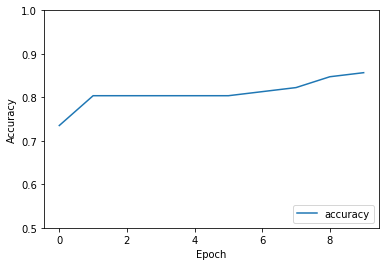

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [0]:
import syft as sy 

hook = sy.TorchHook(torch)

In [0]:
hospital = sy.VirtualWorker(hook, id="hospital")  
clinic = sy.VirtualWorker(hook, id="clinic")  

In [0]:
client_datasets=[(data_hospital,data_hospital_target),(data_clinic, data_clinic_target)]